In [3]:
%matplotlib inline
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split

## Read the Dataset

In [2]:
data = loadmat("ex6data1.mat")
X = data['X']
y = data['y']

FileNotFoundError: [Errno 2] No such file or directory: 'ex6data1.mat'

# Split dataset for train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
type(X_train)

## Plot the data

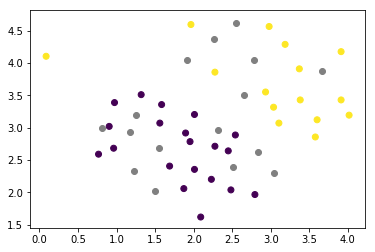

In [10]:
def plotData(color):
    plt.scatter(X_train[:,0], X_train[:,1], c=np.reshape(y_train, -1))
    plt.scatter(X_test[:,0], X_test[:,1], c=color)
    plt.show()
    
plotData('grey')

#### Create and Visualize kNN

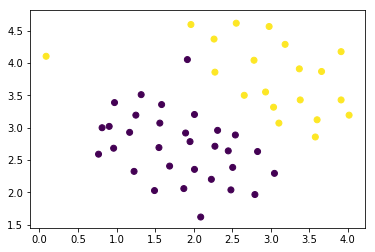

In [11]:
K = 7
y_pred = y_test

def count_distance(j):
    d = dict()
    
    for i in range(len(X_train)):
        dist = np.sqrt((X_train[i,0]-X_test[j,0])**2 + (X_train[i,1]-X_test[j,1])**2)
        d[dist] = i
    
    ones = 0
    zeros = 0
    keys = sorted(d)

    for k in range(K):
        if y_train[d[keys[k]]][0] == 0:
            zeros += 1
        else:
            ones += 1
    
    if (zeros > ones):
        y_pred[j] = 0
    else:
        y_pred[j] = 1

for i in range(len(X_test)):
    count_distance(i)
    
plotData(np.reshape(y_pred, -1))

## Compute accuracy

In [12]:
def accuracy(actual, predicted):
    equal = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            equal += 1
    print("Accuracy is about", equal / len(actual) * 100, "%")

accuracy(y_test, y_pred)

Accuracy is about 100.0 %


## Create LinearSVC and train your data

In [13]:
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

C:\Users\Altynbek\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Compute accuracy

In [14]:
accuracy(y_test, y_pred)

Accuracy is about 93.75 %


## Visualize the Decision Boundary

[1.35756346 1.69954469]


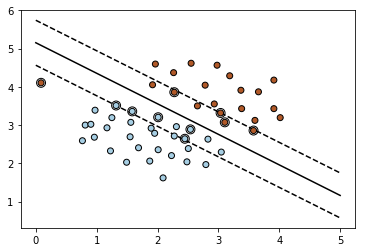

In [15]:
w = clf.coef_[0]
print(w)

a = -w[0] / w[1]

xx = np.linspace(0,5)
yy = a * xx - clf.intercept_[0] / w[1]

margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

h0 = plt.plot(xx, yy, 'k-')

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none', zorder=10, edgecolors='k')
plt.scatter(X[:, 0], X[:, 1], c=np.reshape(y, -1), zorder=10, cmap=plt.cm.Paired, edgecolors='k')
plt.show()